<a href="https://colab.research.google.com/github/seungwoo-Jang/modu_quest/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0, loss 20786.6701
100, loss 5156.6758
200, loss 4675.0348
300, loss 4322.4606
400, loss 4061.0601
500, loss 3864.3917
600, loss 3713.9740
700, loss 3596.8616
800, loss 3503.9619
900, loss 3428.8659


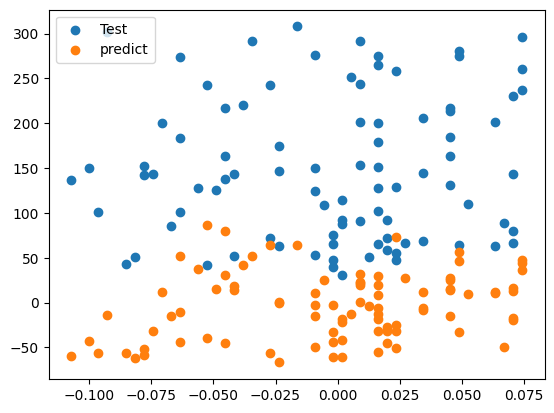

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt

data = load_diabetes()

df_x = pd.DataFrame(data.data,columns=data.feature_names)
df_y = pd.DataFrame(data.target,columns=['target'])

arr_x = df_x.values
arr_y = df_y.values[:,0]
# arr_y = df_y.values[:,0] / 152 #평준화

x_train,x_test,y_train,y_test = train_test_split(arr_x,arr_y,
                                                    test_size=0.2,
                                                    random_state = 10)

W = np.random.rand(x_train.shape[1])
b = np.random.rand()
dW = 0
db = 0


def build_model(X,W,b):
  predict = np.dot(X,W)+b
  return predict

def loss(X,W,b,y):
  predict = build_model(X,W,b)
  L = ((y - predict) ** 2).mean()
  return L

def gradient(X,W,b,y,dW,db):
  N = len(y)
  predict = build_model(X,W,b)
  dW = 1/N * -2 * np.dot(X.T,(y-predict))
  db = -2 * (y - predict).mean()
  return dW,db

def training(X,W,b,y,dW,db,cnt=1000,learning_rate=0.1):
  for i in range(cnt):
    dW,db = gradient(X,W,b,y,dW,db)
    W -= learning_rate * dW
    b -= learning_rate * db
    L = loss(X,W,b,y)
    if i % 100 == 0:
      print(f'{i}, loss {L:.4f}')
  return W,b

def test_val(X,W,b,y):
  predict = build_model(X,W,b)
  mse = loss(X,W,b,y)
  visual(X,predict,y)

def visual(X,predict,y):
  plt.scatter(x_test[:,0],y_test, label='Test')
  plt.scatter(x_test[:,0],predict, label='predict')
  plt.legend()
  plt.show()
  
results = training(x_train,W,b,y_train,dW,db)
test_val(x_test,W,b,y_test)

predict : [0.52121972 0.90226788 1.79192474 ... 1.47452337 0.11376924 0.13922481]
rmse : 0.7600932020837056


<Axes: xlabel='humidity', ylabel='count'>

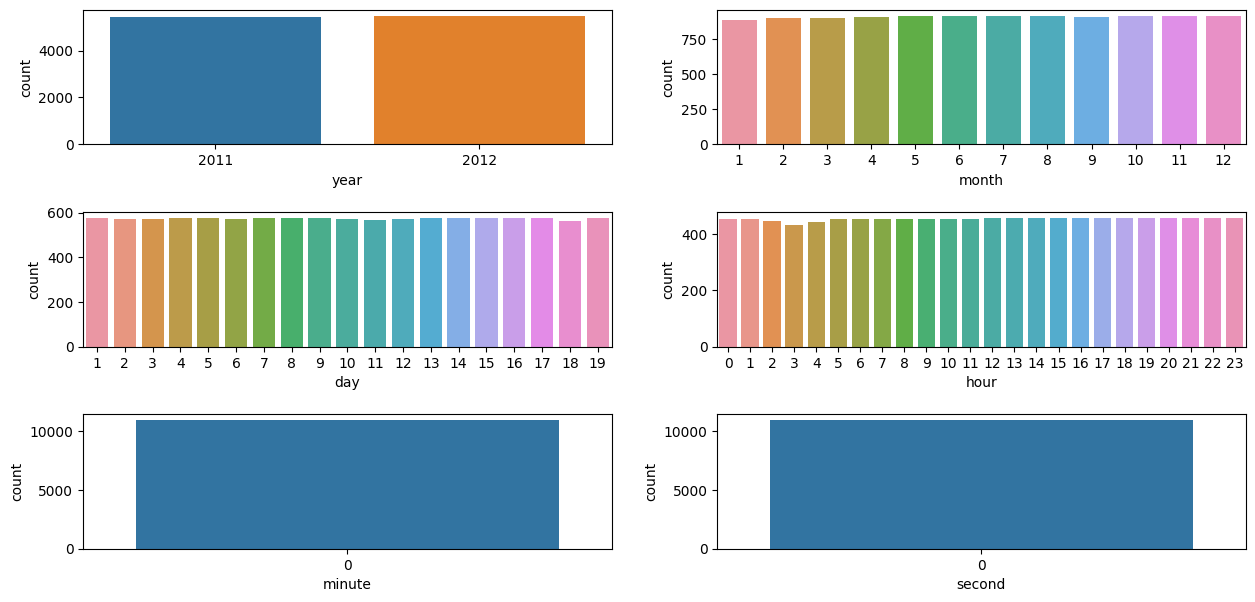

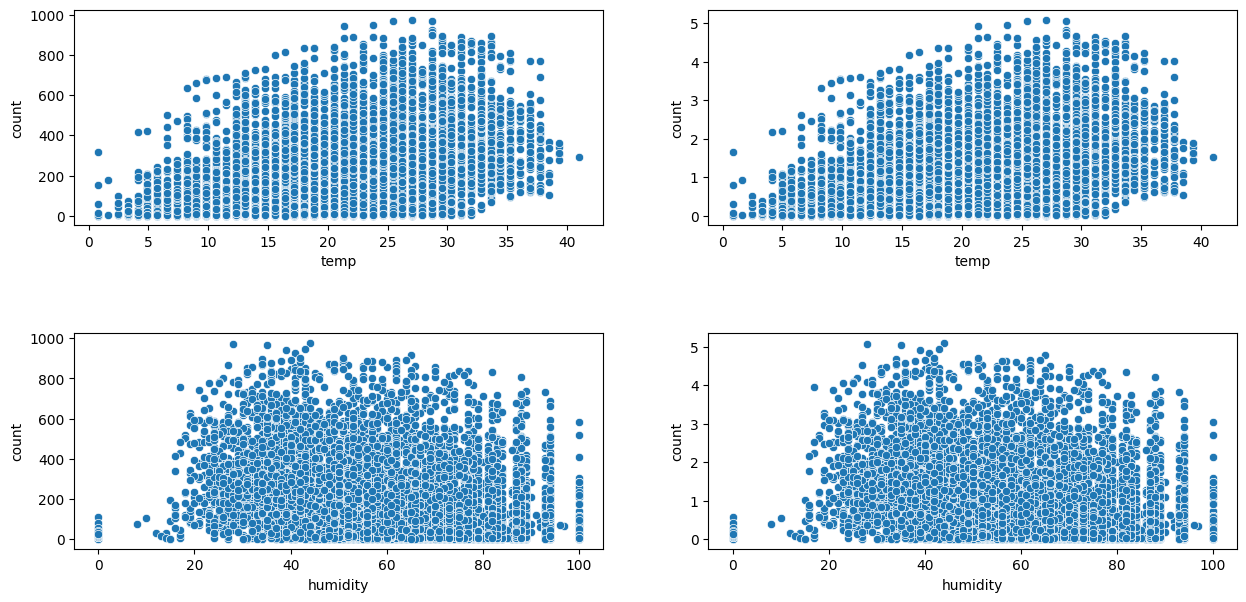

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

'''
시간, 온도, 습도, 계절 등의 정보가 담긴 데이터를 통해 자전거의 대여량을 예측하는 문제입니다.
자전거 대여량을 결정하는 데에는 시간도 중요할 것이고, 요일이나 계절도 크게 영향을 미칠 것 같습니다.
'''

#데이터 가져오기
csv_path = '/content/drive/MyDrive/Colab Notebooks/EXPLORATION_data/E01/train.csv'
data = pd.read_csv(csv_path)

data['datetime'] = pd.to_datetime(data['datetime'], format='%Y-%m-%d %H:%M:%S')
data.describe()

#컬럼 생성 
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['hour'] = data['datetime'].dt.hour
data['minute'] = data['datetime'].dt.minute
data['second'] = data['datetime'].dt.second
data.head()

#데이터 개수 시각화하기
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows= 3, ncols=2)
figure.set_size_inches(15,7)
figure.subplots_adjust(hspace=0.5)

sns.countplot(data=data, x='year', ax=ax1)
sns.countplot(data=data, x='month', ax=ax2)
sns.countplot(data=data, x='day', ax=ax3)
sns.countplot(data=data, x='hour', ax=ax4)
sns.countplot(data=data, x='minute', ax=ax5)
sns.countplot(data=data, x='second', ax=ax6)

#X, y 컬럼 선택 및 train/test 데이터 분리
X = data[['season','holiday','workingday','weather', 'temp', 
         'humidity', 'windspeed','year', 'month', 'day', 'hour']].values
y = data['count'].values
type(X)

# 평준화
# for i in range(X.shape[1]):
#   X[:,i] /= X[:,i].mean()

y = y.astype(float) 
y /= y.mean()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

#LinearRegression 모델 학습
model = LinearRegression()

model.fit(X_train,y_train)

#학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
y_pred = model.predict(X_test)
print(f'predict : {y_pred}')
mse = mean_squared_error(y_test,y_pred)

rmse = np.sqrt(mse)
print(f'rmse : {rmse}')

#x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
#X 데이터가 원본데이터인데 예측결과를 어떻게 표현해야할지 모르겠어여ㅠ
df = pd.DataFrame({'temp':X[:,4], 'humidity':X[:,5], 'count':y})

figure, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows= 2, ncols=2)
figure.set_size_inches(15,7)
figure.subplots_adjust(hspace=0.5)

sns.scatterplot(data=data, x='temp', y = 'count', ax=ax1)
sns.scatterplot(data=df, x='temp', y = 'count', ax=ax2)
sns.scatterplot(data=data, x='humidity', y = 'count', ax=ax3)
sns.scatterplot(data=df, x='humidity', y = 'count', ax=ax4)
